<h1>Visualize: AircraftDynamics.RigidBodyFDM.Examples.ComponentUsage.SourceConstantGravity_ex01</h1>
<h2>notebook: rev004</h2>
<p>compatability with OpenModelica v1.17</p>
<h2>memo: </h2>
<p></p>

<h1>Load modules </h1>

In [1]:
#****************************************
#    User must NOT edit code below 
#****************************************
import OMPython
from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem

import os
from os.path import expanduser

import numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import pathlib
import math

from IPython.display import display, HTML
print('------------------------------')

------------------------------


In [2]:
#****************************************
#    User must NOT edit code below 
#****************************************
# ----- prepare for post process -----
n_df=1000
df=[[]]*n_df
i_df= -1
print('----------')

----------


<h1>===========================================================================</h1>

<h1>Run simulation model #1</h1>

<h1>User settings: Library and Model information</h1>
<p>Edit the strings below </p>

In [3]:
dirWorkRelToHome='/OMPythonWork'

#dirModelRelToLibDir='/Examples/ThermodynamicCycles'
libs2load=["PropulsionSystem", "FluidSystemComponents", "WalkingInWorldOfThermoFluid", "AircraftDynamics", "SystemModels", "InteractiveSimulation"]
fullpathModel='AircraftDynamics.RigidBodyFDM.Examples.ComponentUsage.SourceConstantGravity_ex01'
nmModel='SourceConstantGravity_ex01'
stopTime=100.0
outputFormat='csv'
print('------------------------------')

------------------------------


<h1>Setup </h1>

In [4]:
#**************************************************
# ----- setup -----
#**************************************************
#****************************************
#    User must NOT edit code below 
#****************************************
#*** get directory of this notebook
sys.path.append('..')
pathNotebook= os.getcwd()
print('------------------------------'); print('')

#*** distinguish OS
if(os.name=='nt'):
    dirHome=expanduser("~")
    typeOS='Windows (nt)'
elif(os.name=='posix'):
    dirHome=os.environ['HOME']
    typeOS= 'Linux or Mac (posix)'
##### end if #####

#*** direcotory of temporary work
dirWork= dirHome + dirWorkRelToHome

#*** get library directory
dirLib=''
sys.path.append('..')
dirLib= pathlib.Path('../../')
dirLib_upper1= pathlib.Path('../../')

dirLib= dirLib.resolve()
dirLib= str(dirLib)
dirLib= dirLib.replace('\\', '/')

dirLib_upper1= dirLib_upper1.resolve()

fullpathModelFile= str(dirLib_upper1)+'\\'+fullpathModel.replace('.','\\') +'.mo'
fullpathModelFile= fullpathModelFile.replace('\\', '/')


print("########## check user settings and related info. ##########")
print('-. This OS is: ' + typeOS)
print('-. Home directory of current environment is: ' + dirHome)
print("-. Temporary Working directory is: "+str(dirWork))
print('')
print('-. Directory of This notebook: '+ pathNotebook)
print('-. Directory of library which contains this notebook is: ' + str(dirLib))
print("-. Full path of Model to be ran is: " + fullpathModel)
print("-. Full path of Model file to be ran is: " + fullpathModelFile)

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

------------------------------

########## check user settings and related info. ##########
-. This OS is: Linux or Mac (posix)
-. Home directory of current environment is: /home/ubuntu
-. Temporary Working directory is: /home/ubuntu/OMPythonWork

-. Directory of This notebook: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
-. Directory of library which contains this notebook is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib
-. Full path of Model to be ran is: AircraftDynamics.RigidBodyFDM.Examples.ComponentUsage.SourceConstantGravity_ex01
-. Full path of Model file to be ran is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/AircraftDynamics/RigidBodyFDM/Examples/ComponentUsage/SourceConstantGravity_ex01.mo

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
------------------------

<h1>Setup </h1>

In [5]:
#**************************************************
# ----- setup -----
#**************************************************
#****************************************
#    User must NOT edit code below 
#****************************************
omc= OMCSessionZMQ()

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- move OMShell to working directory
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#--------------------
#    set build option for old frontend
#    this option setting is neccesarry so that model written with older than Modelica 4.0.0 is ran by OpenModelica newer than 1.17.0
#--------------------
print(''); print('...front end setting, wait...')
strcmd='disableNewInstantiation()'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#----------------------------------------
#    settings of command line options
#----------------------------------------
print(''); print('...front end setting, wait...')
strcmd='setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization,evaluateAllParameters,NLSanalyticJacobian")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#----------------------------------------
#-- load Modelica Standard Library
#----------------------------------------
msgOMShell=omc.sendExpression("loadModel(Modelica)")
print("OMShell: "+ str(msgOMShell)); print('')

print('...loading custom libraries, wait...')
for i in range(len(libs2load)):
    #-- load PropulsionSystem library
    print('i='+str(i))
    strcmd='loadFile("' + str(dirLib) +'/'+ libs2load[i] +'/package.mo' + '")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
##### end for #####
print('...load of custom libraries is completed')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

send: cd("/home/ubuntu/OMPythonWork")
OMShell: /home/ubuntu/OMPythonWork

...front end setting, wait...
send: disableNewInstantiation()
OMShell: True

OMShell error message: 



...front end setting, wait...
send: setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization,evaluateAllParameters,NLSanalyticJacobian")
OMShell: True

OMShell error message: 


OMShell: True

...loading custom libraries, wait...
i=0
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/PropulsionSystem/package.mo")
OMShell: True
i=1
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/FluidSystemComponents/package.mo")
OMShell: True
i=2
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/WalkingInWorldOfThermoFluid/package.mo")
OMShell: True
i=3
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/C

<h1>---------------------------------------------------------------------------------------------------------</h1>

<h1>Post Process --- Read csv data into table object ---</h1>

<h2>Read csv, case of default parameter setting</h2>

In [6]:
i_df=0

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= fullpathModel + '_res.csv'
print("data read: "+ os.getcwd()+"/"+nmcsv)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork
------------------------------

data read: /home/ubuntu/OMPythonWork/AircraftDynamics.RigidBodyFDM.Examples.ComponentUsage.SourceConstantGravity_ex01_res.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics


,time,airplaneDyn.XG,airplaneDyn.YG,airplaneDyn.ZG,airplaneDyn.p,airplaneDyn.phi,airplaneDyn.psi,airplaneDyn.q,airplaneDyn.r,airplaneDyn.theta,...,srcGravity.outCntrSrcForceMoment.r[3],srcGravity.outCntrSrcForceMoment.theta[1],srcGravity.outCntrSrcForceMoment.theta[2],srcGravity.outCntrSrcForceMoment.theta[3],srcGravity.outCntrSrcForceMoment.v[1],srcGravity.outCntrSrcForceMoment.v[2],srcGravity.outCntrSrcForceMoment.v[3],srcGravity.phi,srcGravity.psi,srcGravity.theta
0,0.00,0.000000e+00,0,-1000.000000,0,0,0,3.490659,0,0.087266,...,1000.000000,0,0.087266,0,0.000000,0,0.000000,0,0,0.087266
1,0.01,1.152132e-11,0,-999.999510,0,0,0,3.490659,0,0.122173,...,999.999510,0,0.122173,0,-0.011955,0,0.097369,0,0,0.122173
2,0.02,1.712932e-10,0,-999.998038,0,0,0,3.490659,0,0.157080,...,999.998038,0,0.157080,0,-0.030692,0,0.193784,0,0,0.157080
3,0.03,3.309079e-10,0,-999.995586,0,0,0,3.490659,0,0.191986,...,999.995586,0,0.191986,0,-0.056155,0,0.288893,0,0,0.191986
4,0.04,5.939352e-10,0,-999.992152,0,0,0,3.490659,0,0.226893,...,999.992152,0,0.226893,0,-0.088271,0,0.382343,0,0,0.226893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,99.97,-8.429416e-03,0,48020.513016,0,0,0,3.490659,0,349.048397,...,-48020.513016,0,349.048397,0,319.286067,0,-927.273270,0,0,349.048397
9998,99.98,-8.432020e-03,0,48030.320541,0,0,0,3.490659,0,349.083304,...,-48030.320541,0,349.083304,0,351.488093,0,-915.657061,0,0,349.083304
9999,99.99,-8.434626e-03,0,48040.129047,0,0,0,3.490659,0,349.118210,...,-48040.129047,0,349.118210,0,383.268277,0,-902.922810,0,0,349.118210
10000,100.00,-8.437234e-03,0,48049.938535,0,0,0,3.490659,0,349.153117,...,-48049.938535,0,349.153117,0,414.587811,0,-889.085812,0,0,349.153117


<h1> list of columns on csv </h1>

In [7]:
i_df=0

print('list of variables on csv')
df[i_df].columns.tolist()


list of variables on csv


['time',
 'airplaneDyn.XG',
 'airplaneDyn.YG',
 'airplaneDyn.ZG',
 'airplaneDyn.p',
 'airplaneDyn.phi',
 'airplaneDyn.psi',
 'airplaneDyn.q',
 'airplaneDyn.r',
 'airplaneDyn.theta',
 'airplaneDyn.u',
 'airplaneDyn.v',
 'airplaneDyn.w',
 'der(airplaneDyn.XG)',
 'der(airplaneDyn.YG)',
 'der(airplaneDyn.ZG)',
 'der(airplaneDyn.p)',
 'der(airplaneDyn.phi)',
 'der(airplaneDyn.psi)',
 'der(airplaneDyn.q)',
 'der(airplaneDyn.r)',
 'der(airplaneDyn.theta)',
 'der(airplaneDyn.u)',
 'der(airplaneDyn.v)',
 'der(airplaneDyn.w)',
 'der(airplaneDyn.dPhi)',
 'der(airplaneDyn.dPsi)',
 'der(airplaneDyn.dTheta)',
 'der(airplaneDyn.dXG)',
 'der(airplaneDyn.dYG)',
 'der(airplaneDyn.dZG)',
 'der(animAircraft.theta[3])',
 '$cse46',
 'airplaneDyn.alpha',
 'airplaneDyn.alpha4disp',
 'airplaneDyn.alt',
 'airplaneDyn.beta',
 'airplaneDyn.beta4disp',
 'airplaneDyn.d2XG',
 'airplaneDyn.d2YG',
 'airplaneDyn.d2ZG',
 'airplaneDyn.d2phi',
 'airplaneDyn.d2psi',
 'airplaneDyn.d2theta',
 'airplaneDyn.dPhi',
 'airplaneDy

<h1>Read csv, array, specify start and end</h1>

In [8]:
i_df_begin=2
i_df_end=3


#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

for i in range(i_df_begin, i_df_end+1):
    i_df=i
    print('i_df='+str(i_df))
    nmcsv= fullpathModel + '_res_'+str(i_df)+'.csv'
    print("data read: "+ os.getcwd()+"/"+nmcsv)
    df.insert(i_df, pd.read_csv(nmcsv))
##### end for #####
    
#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())


currend dir: /home/ubuntu/OMPythonWork
------------------------------

i_df=2
data read: /home/ubuntu/OMPythonWork/AircraftDynamics.RigidBodyFDM.Examples.ComponentUsage.SourceConstantGravity_ex01_res_2.csv
i_df=3
data read: /home/ubuntu/OMPythonWork/AircraftDynamics.RigidBodyFDM.Examples.ComponentUsage.SourceConstantGravity_ex01_res_3.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics


<h1>Read csv, selected case#</h1>

In [9]:
i_df=1

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= fullpathModel + '_res_'+str(i_df)+'.csv'
print("data read: "+ os.getcwd()+"/"+nmcsv)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork
------------------------------

data read: /home/ubuntu/OMPythonWork/AircraftDynamics.RigidBodyFDM.Examples.ComponentUsage.SourceConstantGravity_ex01_res_1.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics


,time,airplaneDyn.XG,airplaneDyn.YG,airplaneDyn.ZG,airplaneDyn.p,airplaneDyn.phi,airplaneDyn.psi,airplaneDyn.q,airplaneDyn.r,airplaneDyn.theta,...,srcGravity.outCntrSrcForceMoment.r[3],srcGravity.outCntrSrcForceMoment.theta[1],srcGravity.outCntrSrcForceMoment.theta[2],srcGravity.outCntrSrcForceMoment.theta[3],srcGravity.outCntrSrcForceMoment.v[1],srcGravity.outCntrSrcForceMoment.v[2],srcGravity.outCntrSrcForceMoment.v[3],srcGravity.phi,srcGravity.psi,srcGravity.theta
0,0.00,0.000000e+00,0.000000e+00,-1000.000000,6.000000,0.000000,0.000000,3.490659,4.000000,0.087266,...,1000.000000,0.000000,0.087266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087266
1,0.01,5.463943e-11,4.203331e-11,-999.999510,5.906683,0.063837,0.041136,3.669985,3.956868,0.121784,...,999.999510,0.063837,0.121784,0.041136,-0.011918,0.006212,0.097175,0.063837,0.041136,0.121784
2,0.02,1.147515e-10,9.694960e-11,-999.998038,5.809835,0.128398,0.084325,3.844502,3.912327,0.155409,...,999.998038,0.128398,0.155409,0.084325,-0.030369,0.024820,0.192240,0.128398,0.084325,0.155409
3,0.03,1.775773e-10,1.295949e-10,-999.995586,5.709714,0.193758,0.129690,4.014115,3.866530,0.187958,...,999.995586,0.193758,0.187958,0.129690,-0.054991,0.055669,0.283707,0.193758,0.129690,0.187958
4,0.04,2.217444e-10,1.817273e-10,-999.992152,5.606580,0.259987,0.177338,4.178748,3.819627,0.219231,...,999.992152,0.259987,0.219231,0.177338,-0.085339,0.098459,0.370136,0.259987,0.177338,0.219231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,99.97,5.932289e-02,1.399352e-01,48020.493043,6.667970,-1.370321,683.941323,-1.550917,4.314362,-1.028365,...,-48020.493043,-1.370321,-1.028365,683.941323,839.928136,-496.120990,100.816199,-1.370321,683.941323,-1.028365
9998,99.98,5.932507e-02,1.399682e-01,48030.300568,6.708805,-1.340473,683.985091,-1.331936,4.333872,-0.989188,...,-48030.300568,-1.340473,-0.989188,683.985091,819.537158,-524.593856,123.011271,-1.340473,683.985091,-0.989188
9999,99.99,5.932724e-02,1.400013e-01,48040.109074,6.743550,-1.305990,684.024839,-1.110798,4.350497,-0.950069,...,-48040.109074,-1.305990,-0.950069,684.024839,797.917146,-550.632284,149.319784,-1.305990,684.024839,-0.950069
10000,100.00,5.932939e-02,1.400343e-01,48049.918560,6.772078,-1.267677,684.061333,-0.887844,4.364163,-0.911028,...,-48049.918560,-1.267677,-0.911028,684.061333,775.118557,-573.874914,179.486351,-1.267677,684.061333,-0.911028


<h1>===========================================================================</h1>

<h1>Post Process --- Visualization ---</h1>

In [10]:
fig=[]
i_fig=-1
print('------------------------------')

------------------------------


<h2>Simulation results; Inputs</h2>

------------------------------


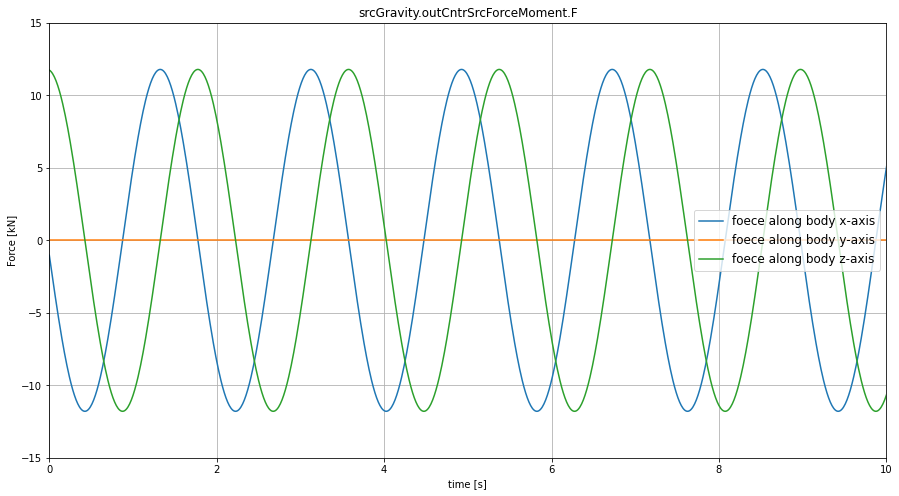

In [24]:
fig.append(plt.figure(figsize=(15,8)))

i_df=0

varName="srcGravity.outCntrSrcForceMoment.F[1]"
label="foece along body x-axis"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]/1000
plt.plot(time, var, label=label)

varName="srcGravity.outCntrSrcForceMoment.F[2]"
label="foece along body y-axis"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]/1000
plt.plot(time, var, label=label)

varName="srcGravity.outCntrSrcForceMoment.F[3]"
label="foece along body z-axis"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]/1000
plt.plot(time, var, label=label)

#----------
plt.xlabel('time [s]')
plt.ylabel('Force [kN]')
plt.title('srcGravity.outCntrSrcForceMoment.F')

plt.legend(loc='center right', fontsize=12)
plt.xlim(0,10)
plt.ylim(-15, 15)
plt.grid()
print('------------------------------')

<h2>Simulation Results; Outputs</h2>

------------------------------


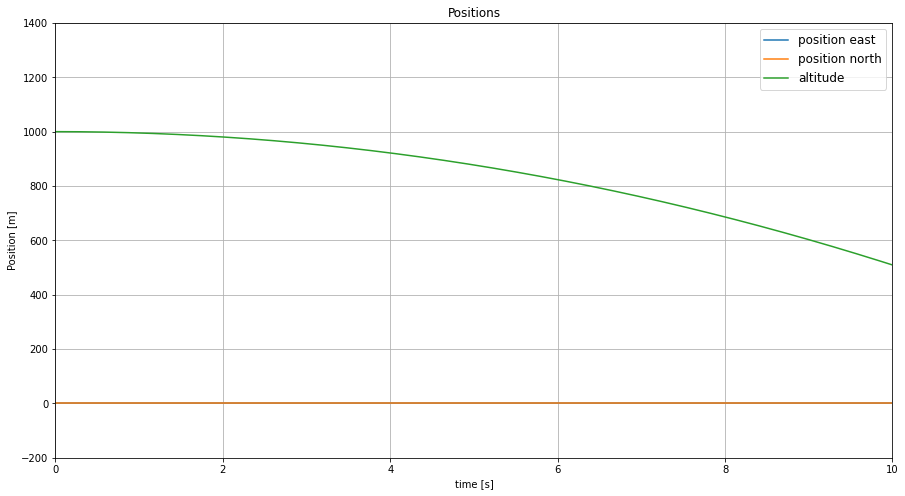

In [48]:
fig.append(plt.figure( figsize=(15,8)))

i_df=0

varName="airplaneDyn.xEast"
label="position east"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label)

varName="airplaneDyn.xNorth"
label="position north"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label)

varName="airplaneDyn.alt"
label="altitude"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label)

#----------
plt.xlabel('time [s]')
plt.ylabel('Position [m]')
plt.title('Positions')

plt.legend(loc='upper right', fontsize=12)
plt.xlim(0,10)
plt.ylim(-200, 1400)
plt.grid()
print('------------------------------')

------------------------------


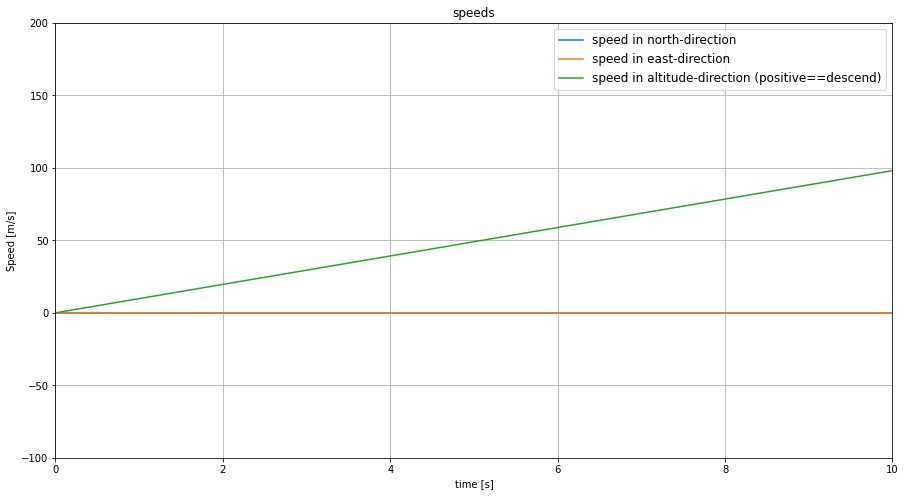

In [75]:
fig.append(plt.figure( figsize=(15,8)))

i_df=0

varName="airplaneDyn.dXG"
label="speed in north-direction"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label)

varName="airplaneDyn.dYG"
label="speed in east-direction"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label)

varName="airplaneDyn.dZG"
label="speed in altitude-direction (positive==descend)"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label)

#----------
plt.xlabel('time [s]')
plt.ylabel('Speed [m/s]')
plt.title('speeds')

plt.legend(loc='upper right', fontsize=12)
plt.xlim(0,10)
plt.ylim(-100, 200)
plt.grid()
print('------------------------------')

------------------------------


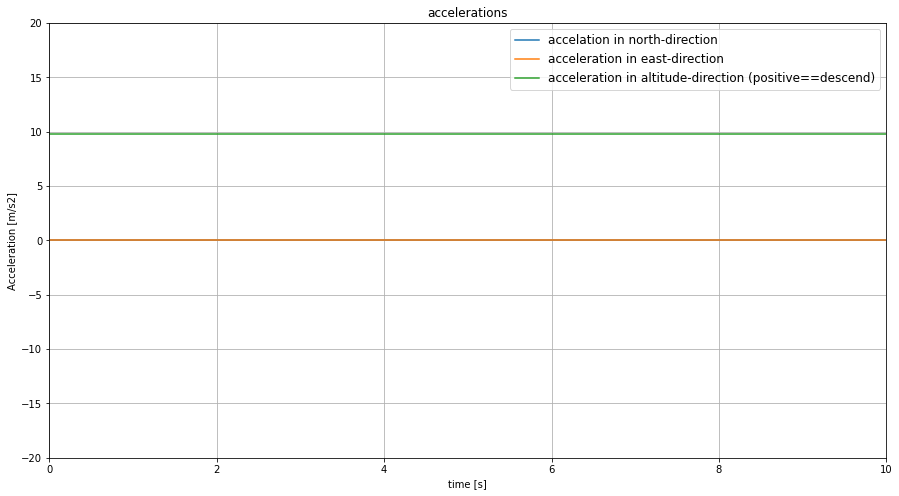

In [74]:
fig.append(plt.figure( figsize=(15,8)))

i_df=0

varName="airplaneDyn.d2XG"
label="accelation in north-direction"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label)

varName="airplaneDyn.d2YG"
label="acceleration in east-direction"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label)

varName="airplaneDyn.d2ZG"
label="acceleration in altitude-direction (positive==descend)"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label)

#----------
plt.xlabel('time [s]')
plt.ylabel('Acceleration [m/s2]')
plt.title('accelerations')

plt.legend(loc='upper right', fontsize=12)
plt.xlim(0,10)
plt.ylim(-20, 20)
plt.grid()
print('------------------------------')

------------------------------


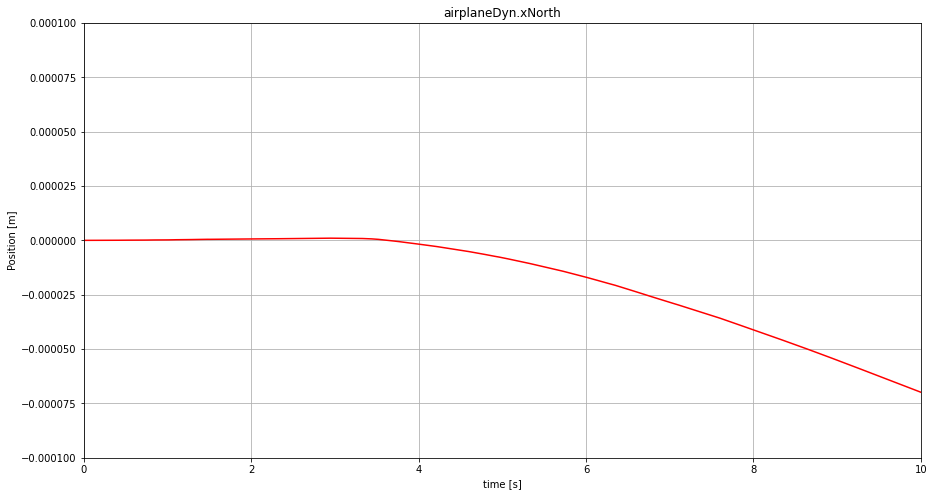

In [65]:
fig.append(plt.figure( figsize=(15,8)))

i_df=0

varName="airplaneDyn.xNorth"
label="position east"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label, color="red")

#----------
plt.xlabel('time [s]')
plt.ylabel('Position [m]')
plt.title(varName)

#plt.legend(loc='upper right', fontsize=12)
plt.xlim(0,10)
plt.ylim(-0.0001, 0.0001)
plt.grid()
print('------------------------------')

------------------------------


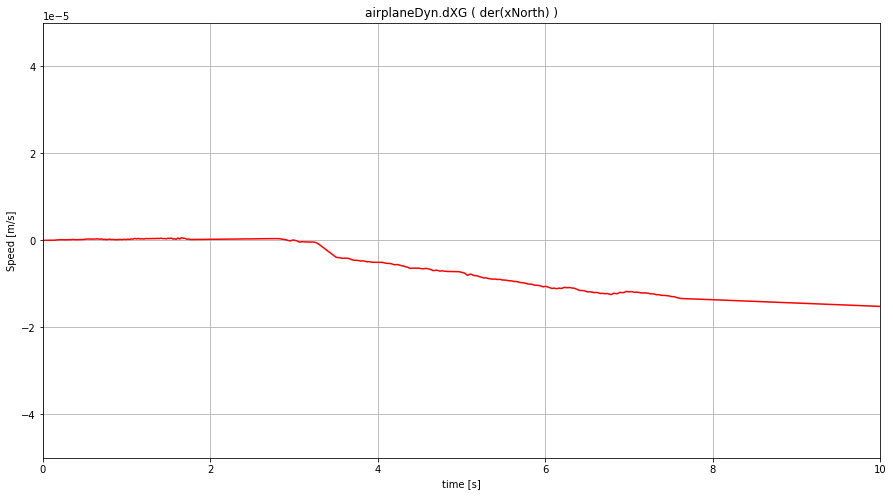

In [84]:
fig.append(plt.figure( figsize=(15,8)))

i_df=0

varName="airplaneDyn.dXG"
label="speed in north-direction"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label, color="red")

#----------
plt.xlabel('time [s]')
plt.ylabel('Speed [m/s]')
plt.title(varName+" ( der(xNorth) )")

#plt.legend(loc='upper right', fontsize=12)
plt.xlim(0,10)
plt.ylim(-0.00005, 0.00005)
plt.grid()
print('------------------------------')

------------------------------


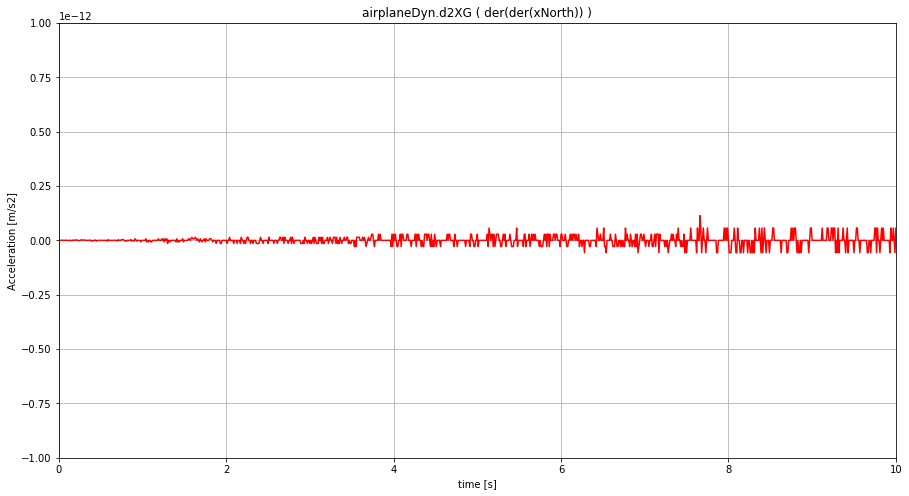

In [85]:
fig.append(plt.figure( figsize=(15,8)))

i_df=0

varName="airplaneDyn.d2XG"
label="accelation in north-direction"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=label, color="red")

#----------
plt.xlabel('time [s]')
plt.ylabel('Acceleration [m/s2]')
plt.title(varName+" ( der(der(xNorth)) )")

#plt.legend(loc='upper right', fontsize=12)
plt.xlim(0,10)
plt.ylim(-1e-12, 1e-12)
plt.grid()
print('------------------------------')

------------------------------


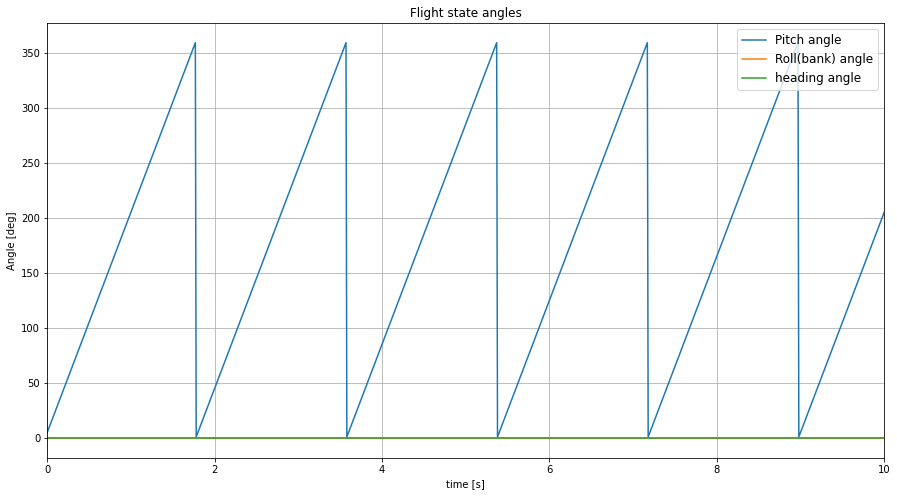

In [35]:
fig.append(plt.figure( figsize=(15,8)))

i_df=0

varName="airplaneDyn.theta4disp"
label="Pitch angle"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]*180.0/math.pi
plt.plot(time, var, label=label)


#----------
varName="airplaneDyn.phi4disp"
label="Roll(bank) angle"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]*180.0/math.pi
plt.plot(time, var, label=label)

#----------
varName="airplaneDyn.psi4disp"
label="heading angle"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]*180.0/math.pi
plt.plot(time, var, label=label)

#----------
plt.xlabel('time [s]')
plt.ylabel('Angle [deg]')
plt.title('Flight state angles')

plt.legend(loc='upper right', fontsize=12)
plt.xlim(0,10)
#plt.ylim(-30, 30)
plt.grid()
print('------------------------------')

<h1>Extract variables at specified time</h1>

<p>-</p>

In [ ]:
'''
i_df=1
tgtTime=45
widthTime=1

#******************************
#*** find the row of target time ***
rowTgt=0
for i in range(len(df[i_df])):
    if((tgtTime-widthTime <= df[i_df].at[i,'time']) and (df[i_df].at[i,'time'] <= tgtTime) ):
        rowTgt=i
        timeExtrd=df[i_df].at[i,'time']
    ##### end if #####
##### end for #####

print("row extracted = "+str(rowTgt))
print("time of extracted = "+str(timeExtrd))

arr_h=[]
arr_s=[]
arr_v=[]
arr_T=[]
arr_u=[]
for i in range(1,5+1):
    # ***** extract specified variables of target row *****
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_h['+str(i)+']')]
    arr_h.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_s['+str(i)+']')]
    arr_s.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_v['+str(i)+']')]
    arr_v.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_T['+str(i)+']')]
    arr_T.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_u['+str(i)+']')]
    arr_u.append(val)
##### end for #####

arr_V=[]
arr_p=[]
for i in range(1,8+1):
    # ***** extract specified variables of target row *****
    val= df[i_df].at[rowTgt, ('PistonCylinder.arr_p['+str(i)+']')]
    arr_p.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.arr_V['+str(i)+']')]
    arr_V.append(val)
##### end for #####

nPts= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_hs[1].nPts')]
s_curve_hs=[[]]*4; h_curve_hs=[[]]*4
v_curve_pv=[[]]*4; p_curve_pv=[[]]*4
s_curve_Ts=[[]]*4; T_curve_Ts=[[]]*4
s_curve_us=[[]]*4; u_curve_us=[[]]*4
V_curve_pVol=[[]]*4; p_curve_pVol=[[]]*4

arrTemp_s_hs=[]; arrTemp_h_hs=[]
arrTemp_s_Ts=[]; arrTemp_T_Ts=[]
arrTemp_s_us=[]; arrTemp_u_us=[]
arrTemp_v_pv=[]; arrTemp_p_pv=[]
arrTemp_V_pVol=[]; arrTemp_p_pVol=[]

for j in range(1, 4+1):
    for i in range(1, nPts+1):
        # ***** extract specified variables of target row *****
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_hs['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_hs.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_hs['+str(j)+'].arr_h['+str(i)+']')]; arrTemp_h_hs.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_Ts['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_Ts.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_Ts['+str(j)+'].arr_T['+str(i)+']')]; arrTemp_T_Ts.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_us['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_us.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_us['+str(j)+'].arr_u['+str(i)+']')]; arrTemp_u_us.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pv['+str(j)+'].arr_v['+str(i)+']')]; arrTemp_v_pv.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pv['+str(j)+'].arr_p['+str(i)+']')]; arrTemp_p_pv.append(val)
        
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pVol['+str(j)+'].arr_V['+str(i)+']')]; arrTemp_V_pVol.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pVol['+str(j)+'].arr_p['+str(i)+']')]; arrTemp_p_pVol.append(val)
    ##### end for #####
    
    s_curve_hs[j-1]=arrTemp_s_hs; arrTemp_s_hs=[]
    h_curve_hs[j-1]=arrTemp_h_hs; arrTemp_h_hs=[]
    s_curve_Ts[j-1]=arrTemp_s_Ts; arrTemp_s_Ts=[]
    T_curve_Ts[j-1]=arrTemp_T_Ts; arrTemp_T_Ts=[]
    s_curve_us[j-1]=arrTemp_s_us; arrTemp_s_us=[]
    u_curve_us[j-1]=arrTemp_u_us; arrTemp_u_us=[]
    v_curve_pv[j-1]=arrTemp_v_pv; arrTemp_v_pv=[]
    p_curve_pv[j-1]=arrTemp_p_pv; arrTemp_p_pv=[]
    
    V_curve_pVol[j-1]=arrTemp_V_pVol; arrTemp_V_pVol=[]
    p_curve_pVol[j-1]=arrTemp_p_pVol; arrTemp_p_pVol=[]
##### end for #####
'''
print('------------------------------')

In [ ]:
'''
fig.append(plt.figure(figsize=(20,20)))
for i in range(4):
    if((i==1-1)or(i==3-1)):
        plt.plot(V_curve_pVol[i], p_curve_pVol[i], linestyle='dashed')
##### end for #####

plt.grid()
plt.title('p vs. V'+ '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('volume [m3]')
plt.ylabel('pressure [Pa]')
for i in range(0, 8-1):
    if((i==1)or(i==3)or(i==4)or(i==6)):
        root=[arr_V[i+1],arr_p[i+1]]
        head=[arr_V[i],arr_p[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.25, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='black', edgecolor='black', linestyle='dashed')
                    )
    ##### end if #####
    
    if((i==5)or(i==7)):
        root=[arr_V[i+1],arr_p[i+1]]
        head=[arr_V[i],arr_p[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.25, headwidth=6, headlength=6, connectionstyle='arc3',
                                    facecolor='black', edgecolor='black', linestyle='dashed')
                    )
    ##### end if #####
##### end for #####

plt.scatter(x=arr_V, y=arr_p, color='red', s=20)

'''
print('------------------------------')

In [ ]:
'''
i_df=1
tgtTime=70
widthTime=1

#******************************
#*** find the row of target time ***
rowTgt=0
for i in range(len(df[i_df])):
    if((tgtTime-widthTime <= df[i_df].at[i,'time']) and (df[i_df].at[i,'time'] <= tgtTime) ):
        rowTgt=i
        timeExtrd=df[i_df].at[i,'time']
    ##### end if #####
##### end for #####

print("row extracted = "+str(rowTgt))
print("time of extracted = "+str(timeExtrd))

arr_h=[]
arr_s=[]
arr_v=[]
arr_T=[]
arr_u=[]
for i in range(1,5+1):
    # ***** extract specified variables of target row *****
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_h['+str(i)+']')]
    arr_h.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_s['+str(i)+']')]
    arr_s.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_v['+str(i)+']')]
    arr_v.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_T['+str(i)+']')]
    arr_T.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_u['+str(i)+']')]
    arr_u.append(val)
##### end for #####

arr_V=[]
arr_p=[]
for i in range(1,8+1):
    # ***** extract specified variables of target row *****
    val= df[i_df].at[rowTgt, ('PistonCylinder.arr_p['+str(i)+']')]
    arr_p.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.arr_V['+str(i)+']')]
    arr_V.append(val)
##### end for #####

nPts= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_hs[1].nPts')]
s_curve_hs=[[]]*4; h_curve_hs=[[]]*4
v_curve_pv=[[]]*4; p_curve_pv=[[]]*4
s_curve_Ts=[[]]*4; T_curve_Ts=[[]]*4
s_curve_us=[[]]*4; u_curve_us=[[]]*4
V_curve_pVol=[[]]*4; p_curve_pVol=[[]]*4

arrTemp_s_hs=[]; arrTemp_h_hs=[]
arrTemp_s_Ts=[]; arrTemp_T_Ts=[]
arrTemp_s_us=[]; arrTemp_u_us=[]
arrTemp_v_pv=[]; arrTemp_p_pv=[]
arrTemp_V_pVol=[]; arrTemp_p_pVol=[]

for j in range(1, 4+1):
    for i in range(1, nPts+1):
        # ***** extract specified variables of target row *****
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_hs['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_hs.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_hs['+str(j)+'].arr_h['+str(i)+']')]; arrTemp_h_hs.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_Ts['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_Ts.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_Ts['+str(j)+'].arr_T['+str(i)+']')]; arrTemp_T_Ts.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_us['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_us.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_us['+str(j)+'].arr_u['+str(i)+']')]; arrTemp_u_us.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pv['+str(j)+'].arr_v['+str(i)+']')]; arrTemp_v_pv.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pv['+str(j)+'].arr_p['+str(i)+']')]; arrTemp_p_pv.append(val)
        
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pVol['+str(j)+'].arr_V['+str(i)+']')]; arrTemp_V_pVol.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pVol['+str(j)+'].arr_p['+str(i)+']')]; arrTemp_p_pVol.append(val)
    ##### end for #####
    
    s_curve_hs[j-1]=arrTemp_s_hs; arrTemp_s_hs=[]
    h_curve_hs[j-1]=arrTemp_h_hs; arrTemp_h_hs=[]
    s_curve_Ts[j-1]=arrTemp_s_Ts; arrTemp_s_Ts=[]
    T_curve_Ts[j-1]=arrTemp_T_Ts; arrTemp_T_Ts=[]
    s_curve_us[j-1]=arrTemp_s_us; arrTemp_s_us=[]
    u_curve_us[j-1]=arrTemp_u_us; arrTemp_u_us=[]
    v_curve_pv[j-1]=arrTemp_v_pv; arrTemp_v_pv=[]
    p_curve_pv[j-1]=arrTemp_p_pv; arrTemp_p_pv=[]
    
    V_curve_pVol[j-1]=arrTemp_V_pVol; arrTemp_V_pVol=[]
    p_curve_pVol[j-1]=arrTemp_p_pVol; arrTemp_p_pVol=[]
##### end for #####
'''
print('------------------------------')

In [ ]:
'''
fig.append(plt.figure(figsize=(20,20)))
for i in range(4):
    if((i==1-1)or(i==3-1)):
        plt.plot(V_curve_pVol[i], p_curve_pVol[i], linestyle='dashed')
##### end for #####

plt.grid()
plt.title('p vs. V'+ '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('volume [m3]')
plt.ylabel('pressure [Pa]')
for i in range(0, 8-1):
    if((i==1)or(i==3)or(i==4)or(i==6)):
        root=[arr_V[i+1],arr_p[i+1]]
        head=[arr_V[i],arr_p[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.25, headwidth=6, headlength=14, connectionstyle='arc3',
                                    facecolor='black', edgecolor='black', linestyle='dashed')
                    )
    ##### end if #####
    
    if((i==5)or(i==7)):
        root=[arr_V[i+1],arr_p[i+1]]
        head=[arr_V[i],arr_p[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.25, headwidth=6, headlength=6, connectionstyle='arc3',
                                    facecolor='black', edgecolor='black', linestyle='dashed')
                    )
    ##### end if #####
##### end for #####

plt.scatter(x=arr_V, y=arr_p, color='red', s=20)
'''
print('------------------------------')

In [ ]:
'''
fig.append(plt.figure(figsize=(10,10)))
plt.scatter(x=arr_s, y=arr_h, color='red', s=60)

for i in range(4):
    plt.plot(s_curve_hs[i], h_curve_hs[i], linestyle='dashed')
##### end for #####
plt.grid()
plt.title('h vs. s' + '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('spec. entropy [J/(kg*K)]')
plt.ylabel('spec. enthalpy [J/kg]')
for i in range(0, 4):
    if((i==1-1)or(i==3-1)):
        plt.annotate('', xy=[arr_s[i+1],arr_h[i+1]], xytext=[arr_s[i],arr_h[i]],
                    arrowprops=dict(shrink=0, width=0.5, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='gray', edgecolor='gray', linestyle='dashed')
                    )
##### end for #####
'''
print('------------------------------')

In [ ]:
'''
fig.append(plt.figure(figsize=(10,10)))
plt.scatter(x=arr_s, y=arr_u, color='red', s=60)

for i in range(4):
    plt.plot(s_curve_us[i], u_curve_us[i], linestyle='dashed')
##### end for #####
plt.grid()
plt.title('u vs. s' + '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('spec. entropy [J/(kg*K)]')
plt.ylabel('spec. internal energy [J/kg]')

for i in range(0, 4):
    if((i==1-1)or(i==3-1)):
        root=[arr_s[i+1],arr_u[i+1]]
        head=[arr_s[i],arr_u[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.5, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='gray', edgecolor='gray', linestyle='dashed')
                    )
##### end for #####
'''
print('------------------------------')

In [ ]:
'''
fig.append(plt.figure(figsize=(10,10)))
plt.scatter(x=arr_s, y=arr_T, color='red', s=60)
for i in range(4):
    plt.plot(s_curve_Ts[i], T_curve_Ts[i], linestyle='dashed')
##### end for #####
plt.grid()
plt.title('T vs. s'+ '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('spec. entropy [J/(kg*K)]')
plt.ylabel('Temperature [K]')

for i in range(0, 4):
    if((i==1-1)or(i==3-1)):
        root=[arr_s[i+1],arr_T[i+1]]
        head=[arr_s[i],arr_T[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.5, headwidth=8, headlength=12, connectionstyle='arc3',
                                    facecolor='gray', edgecolor='gray', linestyle='dashed')
                    )
##### end for #####
'''
print('------------------------------')

<p>----------------------------------------------------------------------</p>

<h1>Process at the end of note</h1>

In [86]:
print(""); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')


------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
------------------------------
